# Płytka sieć w TensorFlow

Konstruowanie płytkiej sieci neuronowej klasyfikującej ręcznie pisane litery

### (opcjonalnie) najpierw zainstalujmy tensorflowa...

In [35]:
!pip install tensorflow

### Import zależności (na wstępie ładujemy tensorboarda)

In [36]:
%load_ext tensorboard
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### Wczytajmy obrazy ze zbioru MNIST

In [37]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

### Sprawdźmy podstawowe cechy zbioru danych

In [38]:
X_train.shape

(60000, 28, 28)

In [39]:
y_train.shape

(60000,)

In [40]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

In [41]:
X_valid.shape

(10000, 28, 28)

In [42]:
y_valid.shape

(10000,)

### Przejrzyjmy konkretne elementy zbioru danych

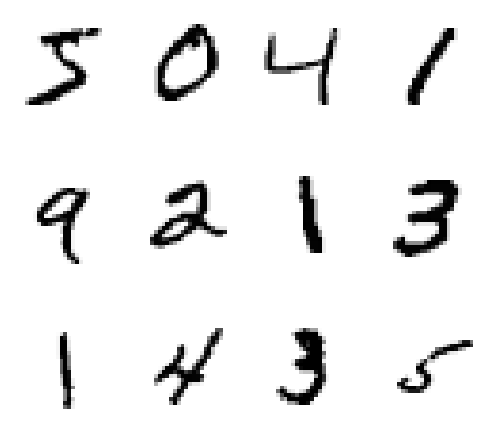

In [43]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

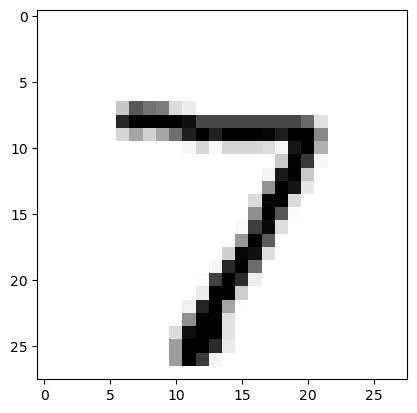

In [44]:
_ = plt.imshow(X_valid[0], cmap='Greys')

In [45]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

**Zadanie 1. Co reprezentują liczby w powyższej tablicy?**

Odp:

Każda liczba w tablicy reprezentuje wartość piksela obrazu w skali szarości. Wartości mieszczą się w zakresie od 0 (biały) do 255 (czarny).

In [46]:
y_valid[0]

7

### Wykonajmy preprocessing danych

Dokonamy zmiany postaci każdego dwuwymiarowego obrazka w jednowymiarową tablicę o rozmiarze równym liczbie pikseli, jednocześnie zamienimy liczby całkowite z zadania 1 w liczby zmiennoprzecinkowe, by móc je następnie znormalizować (czyli by znajdowały się w przedziale <0,1>.

In [47]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

**Zadanie 2. Znormalizuj wartości w zbiorze uczącym X_train i zbiorze walidującym X_valid**

In [48]:
# Odp:
max_value = X_train.max()

X_train = X_train / max_value
X_valid = X_valid / max_value

In [49]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Następnie deklarujemy liczbę możliwych klas i konwertujemy etykiety na kategorie poprzez tzw. one-hot encoding

In [50]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [51]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Zaprojektujmy architekturę sieci

In [52]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

Sieć ma 3 warstwy: 

    - wejściową o 784 neuronach, po jednym dla każdego piksela obrazu
    
    - ukrytą warstwą gęstą (inaczej mówiąc - w pełni połączoną, w której wszystkie neurony połączone są ze wszystkimi z warstwy wcześniejszej), zbudowaną z 64 neuronów sigmoidalnych
    
    - wyjściową, również gęstą, zbudowaną z 10-neuronowej warstwy softmax, po jednym dla każdej kategorii cyfr (0-9)

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Zadanie 3. Wyjaśnij podaną w podsumowaniu modelu liczbę parametrów warstw: 50240 i 650**

Odp:

Liczby 50240 i 650 reprezentują liczbę możliwych do wytrenowania parametrów w poszczególnych warstwach modelu sieci neuronowej.

(liczba jednostek wejściowych + 1) * liczba jednostek wyjściowych:

(784 + 1 ) * 64 = 50240

(64 + 1) * 10 = 650

### Skompilujmy i skonfigurujmy przygotowany model

In [54]:
lr = 0.01

In [55]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=lr), metrics=['accuracy'])

Sieć będzie się uczyć na bazie średniokwadrartowej funkcji straty, a metodą minimalizacji funkcji kosztu będzie SGD

### Przygotujmy środowisko tensorboard do wizualizacji wyników

In [56]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # tworzymy lokalizację, w której utworzą się logi
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # tensorboard jest dodany do procesu uczenia jako callback

### W końcu nauczmy sieć

Wykorzystujemy dane wejściowe treningowe X_train i powiązane etykiety y_train, uczymy w 200 epokach (200 przejść przez wszystkie dane uczące), na 128-obrazkowych paczkach, skuteczność uczenia sprawdzamy już w trakcie uczenia poprzez podanie zbioru walidującego. Chcemy otrzymać wszystkie informacje w trakcie uczenia, stąd argument verbose otrzymuje wartość 1.

In [57]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid), callbacks=[tensorboard_callback])

Epoch 1/200


469/469 [==============================] - 1s 1ms/step - loss: 0.0942 - accuracy: 0.0924 - val_loss: 0.0926 - val_accuracy: 0.1009
Epoch 2/200
469/469 [==============================] - 1s 1ms/step - loss: 0.0920 - accuracy: 0.1080 - val_loss: 0.0914 - val_accuracy: 0.1222
Epoch 3/200
469/469 [==============================] - 1s 1ms/step - loss: 0.0911 - accuracy: 0.1218 - val_loss: 0.0908 - val_accuracy: 0.1315
Epoch 4/200
469/469 [==============================] - 1s 1ms/step - loss: 0.0906 - accuracy: 0.1276 - val_loss: 0.0903 - val_accuracy: 0.1383
Epoch 5/200
469/469 [==============================] - 1s 1ms/step - loss: 0.0901 - accuracy: 0.1349 - val_loss: 0.0899 - val_accuracy: 0.1489
Epoch 6/200
469/469 [==============================] - 1s 1ms/step - loss: 0.0898 - accuracy: 0.1503 - val_loss: 0.0896 - val_accuracy: 0.1708
Epoch 7/200
469/469 [==============================] - 0s 1ms/step - loss: 0.0895 - accuracy: 0.1704 - val_loss: 0.0893 - val_accuracy: 0.1939
Epoch 8/200

### Dokonajmy ewaluacji modelu na zbiorze walidacyjnym

In [ ]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 643us/step - loss: 0.0145 - accuracy: 0.9073


[0.014489601366221905, 0.9072999954223633]

### Możesz spróbować pozmieniać rozmiar batcha, learning_rate, liczbę neuronów w ukrytej wartwie gęstej (lub nawet optymalizator) i podzielić się zauważkami czy przyniosło to jakąś poprawę lub pogorszenie działania sieci

In [ ]:
# Odp:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 2s 928us/step - loss: 0.2570 - accuracy: 0.9266 - val_loss: 0.1334 - val_accuracy: 0.9590
Epoch 2/10
1875/1875 [==============================] - 2s 892us/step - loss: 0.1108 - accuracy: 0.9662 - val_loss: 0.1115 - val_accuracy: 0.9665
Epoch 3/10
1875/1875 [==============================] - 2s 873us/step - loss: 0.0766 - accuracy: 0.9769 - val_loss: 0.0787 - val_accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 2s 885us/step - loss: 0.0564 - accuracy: 0.9826 - val_loss: 0.0778 - val_accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 2s 875us/step - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.0738 - val_accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 2s 886us/step - loss: 0.0343 - accuracy: 0.9895 - val_loss: 0.0827 - val_accuracy: 0.9743
Epoch 7/10
1875/1875 [==============================] - 2s 873us/step - loss: 0.0282 - accuracy: 0.9915 - val_loss: 0.0818 -

### Zwizualizujmy parametry działania sieci w tensorboardzie

In [ ]:
%tensorboard --logdir logs/fit --bind_all

### Sprawdźmy jak dokładnie model działa na pojedynczych przypadkach

w tym celu wyciągamy jedną z próbek (jeden z obrazów) ze zbioru walidacyjnego i wykonujemy na niej metodę prognozującą predict

In [ ]:
valid_0 = X_valid[0].reshape(1, 784)

In [ ]:
model.predict(valid_0)

1/1 [==============================] - 0s 44ms/step


array([[2.0376113e-03, 6.7856995e-04, 7.9439423e-04, 1.1920113e-02,
        3.1816083e-04, 8.4223744e-04, 2.1101064e-04, 9.8097265e-01,
        3.6958267e-04, 1.8557033e-03]], dtype=float32)

**Zadanie 4. Co oznaczają wartości znajdujące się w powyższej tablicy i jaka będzie w związku z tym prognoza co do cyfry na obrazie w tej próbce?**

Odp:

Każda wartość w tablicy odpowiada obliczonemu przez model prawdopodobieństwu odpowiedniej klasy. Na przykład, pierwsza wartość to prawdopodobieństwo, że cyfra to 0, druga wartość to prawdopodobieństwo, że cyfra to 1, i tak dalej, aż do ostatniej wartości, która jest prawdopodobieństwem, że cyfra to 9.

**Zadanie 5. Napisz kod sprawdzający - dla każdego rodzaju cyfry oddzielnie - jaką średnią pewność miała sieć, gdy stwierdzała że na obrazku występuje dana cyfra, niezależnie od tego czy poprawnie rozpoznała czy nie (nie musi być cały zbiór, wystarczy 500 pierwszych elementów). Chodzi o to by zobaczyć, która cyfra dla sieci jest najłatwiejsza do rozpoznania**

In [ ]:
import numpy as np

predictions = model.predict(X_valid[:500])
sum_probabilities = np.zeros(10)

for prediction in predictions:
    sum_probabilities += prediction
average_probabilities = sum_probabilities / 500

for i, avg_prob in enumerate(average_probabilities):
    print(f"Digit {i}: {avg_prob}")